### What Is Isolation Forest?

- Isolation forest is an unsupervised machine learning algorithm for anomaly detection. 
- It identifies anomalies by isolating outliers in the data.
- Isolation Forest is based on the Decision Tree algorithm.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's Pipeline
import time

<b><mark>Preparing modeling data, based on data understaning we already have.</mark></b>

In [3]:
transaction_df3 = pd.read_csv('data/AIML Dataset.csv')

df_modeling3 = transaction_df3.drop(['step','nameOrig','nameDest','isFlaggedFraud'], axis=1)

# Creating the datasets for modeling
y3 = df_modeling3['isFraud']
X3 = df_modeling3.drop('isFraud', axis=1)

# Splitting the date into Training Set and Testing Set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify = y3, test_size=.3)

numeric = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
categorical = ['type']

### <mark>Comparision Model - Isolation Forest</mark>

We will try Isolation Forest (anomaly detection) on our data to see how it performs.

<b><mark>Isolation Forect with <b>Synthetic Minority Over-sampling Technique (SMOTE)</mark></b>

In [49]:
# Create preprocessor with passthrough
preprocessor3 = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create SMOTE
smote3 = SMOTE(random_state=42)

# Create imblearn pipeline with preprocessor, SMOTE, and Isolation Forest
pipeline3 = ImbPipeline([("prepocessor", preprocessor3), ('smote', smote3), ("model", IsolationForest(n_jobs=-1, random_state=42))])
pipeline3

,steps,"[('prepocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('catigorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready f

In [51]:
# Fit the imblearn pipeline (ensure SMOTE is only applied to the training data)
start_time = time.perf_counter()
pipeline3.fit(X_train3, y_train3)
end_time = time.perf_counter()

# Calculate and print the training time
training_duration = end_time - start_time
print(f"Isolation Forest (using SMOTE) training took: {training_duration:.4f} seconds")

# Predict using test data
y_test_predict_anom = pipeline3.predict(X_test3)

# Map Isolation Forest predictions (-1: anomaly, 1: normal) to binary (1: anomaly, 0: normal)
y_test_predict3 = np.where(y_test_predict_anom == -1, 1, 0)

# Generate and display Classification Report.
print("Isolation Forest Classification Report using SMOTE:")
print(classification_report(y_test3, y_test_predict3))

# Generate and display Confusion Matrix.
print("Isolation Forest Confusion Matrix using SMOTE:")
print(confusion_matrix(y_test3, y_test_predict3))

Isolation Forest (using SMOTE) training took: 4.1043 seconds
Isolation Forest Classification Report using SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1906322
           1       0.00      0.11      0.00      2464

    accuracy                           0.82   1908786
   macro avg       0.50      0.46      0.45   1908786
weighted avg       1.00      0.82      0.90   1908786

Isolation Forest Confusion Matrix using SMOTE:
[[1556990  349332]
 [   2190     274]]


<mark><b>The performance of Isolation Forest model with SMOTE is quite poor.</b></mark>
- Accuracy score is 82%
- Precision score of Fraud class is 0% (349,332 false positives)
- Recall score of Fraud class is 11% (2,190 false negatives)
- F1-score of Fraud class is 0%

<b><mark>Based on the performace with SMOTE, we will now try Isolation Forest without SMOTE.<mark></b>

In [43]:
# Create preprocessor with passthrough
preprocessor3 = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create imblearn pipeline with preprocessor, SMOTE, and Isolation Forest
pipeline3 = ImbPipeline([("prepocessor", preprocessor3), ("model", IsolationForest(n_jobs=-1, random_state=42))])
pipeline3

,steps,"[('prepocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('catigorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for fo

In [45]:
# Fit the imblearn pipeline
start_time = time.perf_counter()
pipeline3.fit(X_train3)
end_time = time.perf_counter()

# Calculate and print the training time
training_duration = end_time - start_time
print(f"Isolation Forest (without SMOTE) training took: {training_duration:.4f} seconds")

# Predict using test data
y_test_predict_anom = pipeline3.predict(X_test3)

# Map Isolation Forest predictions (-1: anomaly, 1: normal) to binary (1: anomaly, 0: normal)
y_test_predict3 = np.where(y_test_predict_anom == -1, 1, 0)

# Generate and display Classification Report.
print("Isolation Forest Classification Report without SMOTE:")
print(classification_report(y_test3, y_test_predict3))

# Generate and display Confusion Matrix.
print("Isolation Forest Confusion Matrix without SMOTE:")
print(confusion_matrix(y_test3, y_test_predict3))

Isolation Forest (without SMOTE) training took: 2.2476 seconds
Isolation Forest Classification Report without SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93   1906322
           1       0.01      0.59      0.01      2464

    accuracy                           0.86   1908786
   macro avg       0.50      0.72      0.47   1908786
weighted avg       1.00      0.86      0.93   1908786

Isolation Forest Confusion Matrix without SMOTE:
[[1646686  259636]
 [   1020    1444]]


<mark><b>The performance of Isolation Forest model without SMOTE is better than with SMOTE, but not much better.</b></mark>
- Accuracy score is 86%
- Precision score of Fraud class is 1% (259,636 false positives)
- Recall score of Fraud class is 59% (1,020 false negatives)
- F1-score of Fraud class is 1%

<mark><b>Therefore we will not use SMOTE with Isolation Forest model.</b></mark>

<mark><b>Hyperparameter tuning Isolation Forest using Grid Search cross-validation</b></mark>

In [24]:
# Create preprocessor with passthrough
preprocessor = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create imblearn pipeline with preprocessor, SMOTE, and Logistic Regression model
pipeline = ImbPipeline([("prepocessor", preprocessor), ("model", IsolationForest(n_jobs=-1, random_state=42))])

params = {'model__n_estimators': [10, 50, 100, 500, 1000]}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=params, scoring="recall", cv=5, n_jobs=-1) # n_jobs=-1 means using all available CPUs
# print("Performing Grid Search")

# Map Binary (1: fraud, 0: normal) to Isolation Forest predictions (-1: anomaly, 1: normal) 
y_train3_anom = np.where(y_train3 == 1, -1, 1)
grid_search.fit(X_train3, y_train3_anom)

# Get the best parameters and best recall cross-validation score
print(f"Isolation Forest Best parameters: {grid_search.best_params_}")
print(f"Isolation Forest Best recall cross-validation score: {grid_search.best_score_}")

Isolation Forest Best parameters: {'model__n_estimators': 50}
Isolation Forest Best recall cross-validation score: 0.8620661651003274


<b><mark>Evaluating Isolation Forest (with n_estimators = 50) by Cross-Validation using Stratified K-Fold cross-validation</mark></b>

Isolation Forest (without SMOTE) cross-validation took: 9.7809 seconds
Isolation Forest Overall Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93   6354407
           1       0.01      0.64      0.01      8213

    accuracy                           0.87   6362620
   macro avg       0.50      0.75      0.47   6362620
weighted avg       1.00      0.87      0.93   6362620

Overall Confusion Matrix:
[[5509778  844629]
 [   2995    5218]]


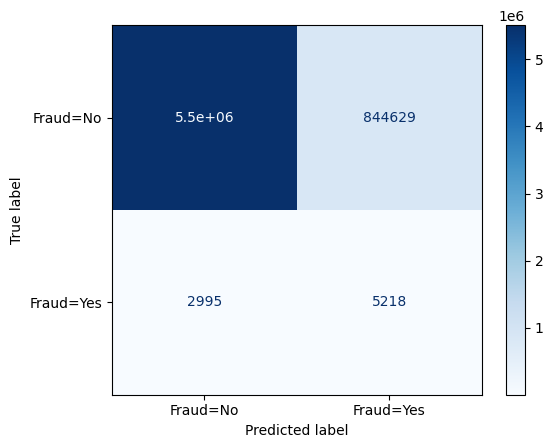

In [29]:
# Create preprocessor with passthrough
preprocessor3 = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric), ("catigorical", OneHotEncoder(), categorical)], remainder='passthrough')

# Create imblearn pipeline with preprocessor and Random Forest Classifier
pipeline3 = ImbPipeline([("prepocessor", preprocessor3), ("model", IsolationForest(n_estimators=50, n_jobs=-1, random_state=42))])

# Configure Stratified k-Fold with 5 folds, shuffle = True for better results, and set a random state for reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Map Binary (1: fraud, 0: normal) to Isolation Forest predictions (-1: anomaly, 1: normal) 
y3_anom = np.where(y3 == 1, -1, 1)

# Get the cross-validated predictions for each test fold
start_time = time.perf_counter()
y_all_predict_anom = cross_val_predict(pipeline3, X3, y3_anom, cv=skf, n_jobs=-1) # n_jobs=-1 means using all available CPUs
end_time = time.perf_counter()

# Calculate and print the cross-validation time
training_duration = end_time - start_time
print(f"Isolation Forest (without SMOTE) cross-validation took: {training_duration:.4f} seconds")

# Map Isolation Forest predictions (-1: anomaly, 1: normal) to binary (1: anomaly, 0: normal)
y_all_predict3 = np.where(y_all_predict_anom == -1, 1, 0)

# Generate overall Classification Report
print("Isolation Forest Overall Classification Report:")
print(classification_report(y3, y_all_predict3))

# Generate overall Confusion Matrix
conf_mat = confusion_matrix(y3, y_all_predict3)
# Plot overall Confusion Matrix using ConfusionMatrixDisplay
print("Overall Confusion Matrix:")
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Fraud=No', 'Fraud=Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Observations

<mark><b>So far Isolation Forest is performing poorly as compared to Random Forest Classifier and the baseline Logistic Regression model.</b></mark>

Tried tuning n_estimators, max_samples, and contamination parameters but still did not achieve performance better than achieved above.
- Accuracy score as 87%
- Precision score of Fraud class as 1%
- Recall score of Fraud class as 64%
- F1-score of Fraud class as 1%

This may be due to reasons such as:
- Anomalies are clustered
- Anomalies are local
- Data dimentionality is not high enough

### Next Step

We need to look deeper into the data for features that highlight the unusual aspects of the data. 
